In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import os


In [2]:
data = pd.read_csv('loan_approval_dataset.csv')
data = data.iloc[:,1:]
data.sample()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1488,2,Graduate,No,2800000,11000000,16,525,8200000,1800000,5800000,2400000,Rejected


In [3]:
data.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [5]:
data.describe()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [6]:
data.columns = data.columns.str.strip()

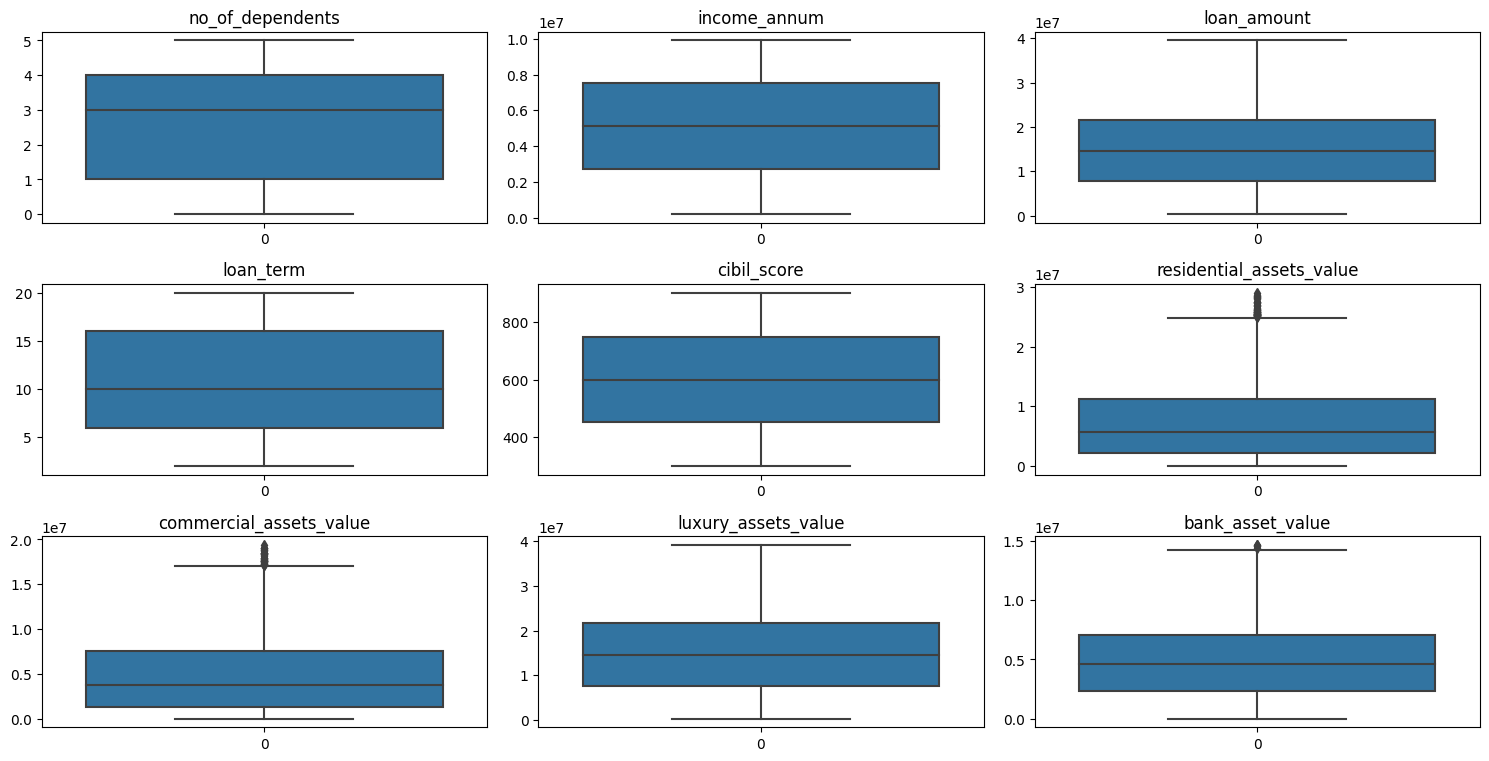

In [7]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [8]:
# Fix negative values first
num_cols = ['residential_assets_value', 'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
data[num_cols] = data[num_cols].clip(lower=0)

# IQR-based capping
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower,
                           np.where(df[col] > upper, upper, df[col]))
    return df

num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data = cap_outliers(data, num_cols)

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['education', 'self_employed', 'loan_status']
le = LabelEncoder()

for col in cat_cols:
    data[col] = le.fit_transform(data[col])
    
# Check encoding
data.head()


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2.0,0,0,9600000.0,29900000.0,12.0,778.0,2400000.0,17050000.0,22700000.0,8000000.0,0
1,0.0,1,1,4100000.0,12200000.0,8.0,417.0,2700000.0,2200000.0,8800000.0,3300000.0,1
2,3.0,0,0,9100000.0,29700000.0,20.0,506.0,7100000.0,4500000.0,33300000.0,12800000.0,1
3,3.0,0,0,8200000.0,30700000.0,8.0,467.0,18200000.0,3300000.0,23300000.0,7900000.0,1
4,5.0,1,1,9800000.0,24200000.0,20.0,382.0,12400000.0,8200000.0,29400000.0,5000000.0,1


In [10]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

print("Feature shape:", X.shape)
print("Target distribution:\n", y.value_counts())



Feature shape: (4269, 11)
Target distribution:
 loan_status
0    2656
1    1613
Name: count, dtype: int64


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Scale features first
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("Balanced feature shape:", X_balanced.shape)
print("Balanced target distribution:\n", pd.Series(y_balanced).value_counts())


Balanced feature shape: (5312, 11)
Balanced target distribution:
 loan_status
0    2656
1    2656
Name: count, dtype: int64


cibil_score                 0.833840
loan_term                   0.057371
loan_amount                 0.025319
income_annum                0.015106
luxury_assets_value         0.014333
residential_assets_value    0.013728
bank_asset_value            0.012733
commercial_assets_value     0.012259
no_of_dependents            0.011125
self_employed               0.002318
education                   0.001869
dtype: float64


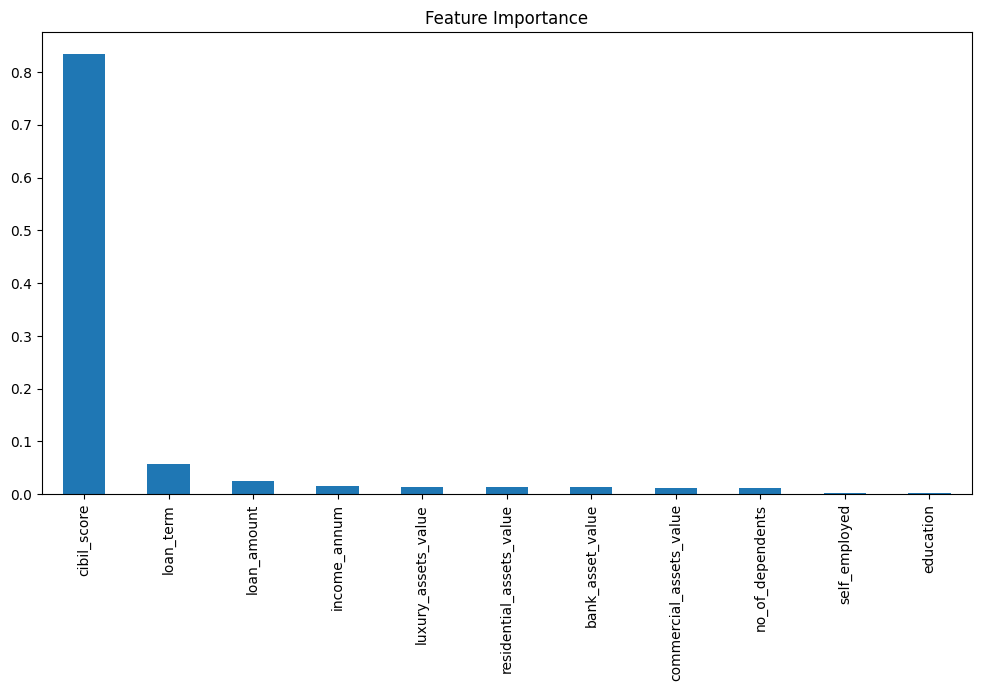

In [12]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest on your balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_balanced, y_balanced)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns
feat_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display
print(feat_importance)

# Plot
plt.figure(figsize=(12,6))
feat_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [13]:
selected_features = ['cibil_score',    'loan_term',    'loan_amount',    'income_annum',    'luxury_assets_value',
                'residential_assets_value',    'bank_asset_value',    'commercial_assets_value',    'no_of_dependents']
X_selected = pd.DataFrame(X_balanced, columns=X.columns)[selected_features]
X_selected.sample()

,cibil_score,loan_term,loan_amount,income_annum,luxury_assets_value,residential_assets_value,bank_asset_value,commercial_assets_value,no_of_dependents
2230,-0.417238,0.54297,0.073715,0.263985,0.689213,-0.179124,1.146172,-1.115006,0.885344


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X_selected, y_balanced, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Training shape:", y_train.shape)
print("Testing shape:", y_test.shape)


Training shape: (4249, 9)
Testing shape: (1063, 9)
Training shape: (4249,)
Testing shape: (1063,)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import mlflow
import dagshub

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}







c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\mlflow\utils\requirements_utils.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # noqa: TID251
c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\pydantic\_internal\_config.py:383: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


In [16]:

# Read variables
load_dotenv()
tracking_uri = os.getenv("MLFLOW_TRACKING_URI")
repo_owner = os.getenv("DAGSHUB_REPO_OWNER")
repo_name = os.getenv("DAGSHUB_REPO_NAME")
experiment_name = os.getenv("MLFLOW_EXPERIMENT_1_NAME")


# Setup MLflow
mlflow.set_tracking_uri(tracking_uri)
dagshub.init(repo_owner=repo_owner, repo_name=repo_name, mlflow=True)
mlflow.set_experiment(experiment_name)


Accessing as omalbhare

Initialized MLflow to track repo "omalbhare/loan-approval-prediction"

Repository omalbhare/loan-approval-prediction initialized!

<Experiment: artifact_location='mlflow-artifacts:/36565e011a5645a4a27f7e8a94597901', creation_time=1760277232551, experiment_id='2', last_update_time=1760277232551, lifecycle_stage='active', name='experiment_1', tags={}>

In [17]:
with mlflow.start_run(run_name="All Models") as parent_run:
    for name, model in models.items():
        # Nested run for each individual model
        with mlflow.start_run(run_name=name, nested=True):
            # Train model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None
            
            # Calculate metrics
            acc = accuracy_score(y_test, y_pred)
            auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
            report = classification_report(y_test, y_pred, output_dict=True)
            
            # Log metrics
            mlflow.log_metric("accuracy", acc)
            if auc is not None:
                mlflow.log_metric("roc_auc", auc)

            # Log params
            mlflow.log_param("model_name", name)
            
            # Log classification report metrics individually
            for key in ["0", "1", "macro avg", "weighted avg"]:
                for metric in ["precision", "recall", "f1-score", "support"]:
                    metric_name = f"{key}_{metric}"
                    mlflow.log_metric(metric_name, report[key][metric])
            
            # Log model artifact
            mlflow.sklearn.log_model(model, artifact_path="model")
            
            # Print results
            print(f"--- {name} ---")
            print("Accuracy:", acc)
            print("ROC AUC:", auc if auc is not None else "N/A")
            print("Classification Report:\n", classification_report(y_test, y_pred))
            print("-"*50)

--- Logistic Regression ---
Accuracy: 0.929444967074318
ROC AUC: 0.97128065278991
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       502
           1       0.93      0.94      0.93       561

    accuracy                           0.93      1063
   macro avg       0.93      0.93      0.93      1063
weighted avg       0.93      0.93      0.93      1063

--------------------------------------------------


c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


--- Decision Tree ---
Accuracy: 0.9755409219190969
ROC AUC: 0.9756748407439759
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       502
           1       0.98      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063

--------------------------------------------------


c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


--- Random Forest ---
Accuracy: 0.980244590780809
ROC AUC: 0.9985246181051196
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       502
           1       0.99      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063

--------------------------------------------------


c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


--- Gradient Boosting ---
Accuracy: 0.9793038570084666
ROC AUC: 0.9980292732812066
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       502
           1       0.99      0.97      0.98       561

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063

--------------------------------------------------


c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


--- SVM ---
Accuracy: 0.9520225776105362
ROC AUC: 0.9886337004921492
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       502
           1       0.95      0.96      0.95       561

    accuracy                           0.95      1063
   macro avg       0.95      0.95      0.95      1063
weighted avg       0.95      0.95      0.95      1063

--------------------------------------------------


c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
c:\Users\omalb\.conda\envs\loan_approval_env\lib\site-packages\_distutils_hack\__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


--- KNN ---
Accuracy: 0.9209783631232361
ROC AUC: 0.9765359240400253
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       502
           1       0.91      0.95      0.93       561

    accuracy                           0.92      1063
   macro avg       0.92      0.92      0.92      1063
weighted avg       0.92      0.92      0.92      1063

--------------------------------------------------


In [18]:
import joblib
import os
os.makedirs('data', exist_ok=True)
joblib.dump(X_train, "data/X_train.pkl")
joblib.dump(X_test, "data/X_test.pkl")
joblib.dump(y_train, "data/y_train.pkl")
joblib.dump(y_test, "data/y_test.pkl")

['data/y_test.pkl']